In [1]:
import numpy as np
import re
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [2]:
f = open('../../input.txt', 'r')
ds = f.read()
f.close()

In [19]:
# for ix in ds[:1000].split('\n'):
#     print [ix.strip()]

print '$$$'.join(['1', '2', '3'])

1$$$2$$$3


In [263]:
# print ds.index('A STUDY IN SCARLET')
start = 3433
length = 50000

data = ' '.join([ix.strip() for ix in ds[start:start+length].split('\n')]).lower()

import pandas as pd
df = pd.read_csv('../../trump_tw.csv')['text']
data = '. '.join([str(ix) for ix in df]).lower()


In [265]:
# print data
print len(data)

print len(set(data))

3713941
148


In [266]:
T = {}

# define order of the Markov chain
order = 5

for ix in range(len(data)-order):
    # get the current context
    ctx = data[ix:ix+order]
    
    # get the future val
    future_val = data[ix+order]
    
    # check if the context exists
    if T.get(ctx) is None:
        T[ctx] = {}
        T[ctx][future_val] = 1
    else:
        # check if the future_val key exists
        if T[ctx].get(future_val) is None:
            T[ctx][future_val] = 1
        else:
            T[ctx][future_val] += 1

In [270]:
len(T.keys())

427671

In [267]:
for kx in T.keys():
    s = float(sum(T[kx].values()))
    
    for k in T[kx].keys():
        T[kx][k] = T[kx][k]/s
# print T['h']

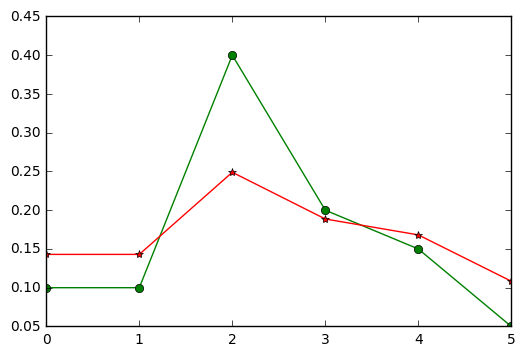

In [268]:
def temp_sample(probs, temp=1.0):
    probs = np.asarray(probs)
    exp_probs = np.exp(np.log(probs) / temp)
    
    return list(exp_probs / exp_probs.sum())

p = [0.1, 0.1, 0.4, 0.2, 0.15, 0.05]
q = temp_sample(p, 2.50)

plt.plot(p, 'go-')
plt.plot(q, 'r*-')

plt.show()

In [271]:
def generate_next(ctx, diversity=1.0):
    r = np.random.random()
    
    possible = T.get(ctx)
    
    if possible is None:
        return ' '
    diverse_probs = temp_sample(possible.values(), temp=diversity)
    return np.random.choice(possible.keys(), p=diverse_probs)

In [236]:
print T['t']
print generate_next("t", diversity=1.0)

{'!': 0.0009727626459143966, ' ': 0.21789883268482482, '"': 0.00032425421530479895, "'": 0.002269779507133593, '-': 0.0032425421530479885, ',': 0.017509727626459144, '.': 0.01848249027237354, ';': 0.0006485084306095979, '?': 0.0032425421530479885, 'a': 0.045071335927367055, 'c': 0.0038910505836575863, 'e': 0.08495460440985733, 'i': 0.06744487678339818, 'h': 0.29928664072632943, 'm': 0.0016212710765239943, 'l': 0.01913099870298314, 'o': 0.10505836575875482, 'n': 0.0012970168612191958, 'p': 0.00032425421530479895, 's': 0.015888456549935148, 'r': 0.029182879377431897, 'u': 0.020752269779507133, 't': 0.024319066147859912, 'w': 0.005836575875486381, 'y': 0.011348897535667963}
i


In [288]:
ind = int(np.random.random()*(len(data)-order))
initial_state = 'mexic'#data[ind:ind+order]
ctx = initial_state

sentence = '' + ctx

for ix in range(2000):
    nxt = generate_next(ctx, diversity=0.8)
    sentence += nxt
    ctx = sentence[-order:]

print sentence

mexico to make america great racist' in police best parts...... http://t.co/myiwkyfivu. we just got the us---and end pay for everyone who would country. no missile.. the ice is one your stand speech tonight, i things will credible to make america great politicians by @thegarybusey i have been are on trade deal, and this country need a sweet meetings, with larry to funny. "@biglakes you notice in debt in in florida - the respond ted cruz should be fixed on the bigger, censorship now!. thank you have pass of the predicted that iran nuclear the season a nice.. @trump tower buildings http://t.co/y6vyva0gn8 the most voting our best sees nervous because has of the this come." #timetogether, who build a heck if angelo and america greatest me for your send our commercials you built work. "@jeremymanning at us, we will be interview when you should have to the great guy - reality the @white house. "@piersmorgan: donaldtrump @brendakenewscaster! http://t.co/gdrxb3addu. "@bxldgxng: @realdonaldtrum